# Australian EV Charging Station Dataset (Queensland & Melbourne)

###  Importing important packages and libraries ###

In [1]:
import numpy as np
import os
import math
from numpy import mean
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import time
from numpy import nan
import googlemaps
import requests
import json
import warnings
warnings.filterwarnings("ignore")
warnings.simplefilter(action='ignore')

In [2]:
df_au = pd.read_csv('D:/Deakin University (Applied AI (Professional)/SIT782- Team Project (B)/Tasks/Identifying data sources of location of charging stations/MEVdata1.csv')
df_au

,Unnamed: 0,Location Name,Latitude,Longitude,Address,Status,Description,Nearest charging station,Plugs_wall_AU/NZ,Plugs_CHAdeMO,...,Plugs_J-1772,Plugs_Type2,KW_50,KW_22,Location_category,Car_parking,Score,Contact_info,charging_stations,payment
0,0,Gatton,-27.551404,152.335073,"Building 8156, The University of Queensland, M...",Active,University of Queensland Gatton Veterinary Hos...,"Toowoomba: 55km West, \nBrisbane: 92km East",1,1,...,0,0,1,1,Commercial,0,8.4,61-733652235,4,0.2
1,1,Cairns,-16.920457,145.778873,"1 Pier Point Rd, Cairns City QLD 4870, Australia",Active,Lagoon car park (between the Esplanade and Pie...,"The Pier Cairns: 0.1km, Pullman Reef Hotel Cas...",0,1,...,0,2,1,1,Public,1,10.0,61-1300480903,3,0.3
2,2,Rockhampton,-23.382272,150.513462,"172-189 Alma St, Rockhampton City QLD 4700, Au...",Active,Alma St carpark of council building.,"Coffee House Apartment: 0.1km, Rockhampton Car...",0,1,...,0,2,1,1,Public,0,10.0,NaN,3,0.2
3,3,Coolangatta,-28.164197,153.515274,"1 Eastern Ave, Bilinga 4225",Active,Gold Coast Airport. Carparks near northbound s...,"Rydges Gold Coast Airport: 0.4km, Southern Cro...",0,1,...,0,2,1,1,Public,0,10.0,61-1300518038,3,0.3
4,4,Hamilton,-27.444492,153.083611,"North Shore Hamilton\n281 MacArthur Ave, Hamil...",Active,"Eat St carpark, near roundabout at end of Maca...","Eat St Northshore Car Park: 0.2km, Brisbane Ai...",0,2,...,0,2,1,1,Public,0,10.0,61-1300480903,5,0.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62,61,Lonsdale St,-37.810060,144.969700,"Corner Exhibition & Lonsdale St, Melbourne VIC...",Active,Valet parking required. HPWC is on level P4 ne...,"Secure Parking (59 Lonsdale Street): 0.1km, Wi...",0,0,...,0,0,0,1,Commercial,0,NaN,61-396623900,1,p
63,63,St Kilda,-37.862236,144.973998,"2 Acland St, St Kilda VIC 3182, Australia",Active,Available to the public. GROUND floor as you e...,"Stokehouse St Kilda: 0.6km, Pullman Melbourne ...",0,0,...,0,2,0,1,Public,0,10.0,NaN,4,p
64,64,St Kilda,-37.867650,144.974293,"30 Jacka Blvd, St Kilda VIC 3182, Australia",Active,"Dining, EV Parking, Park","The Prince Hotel: 0.6km, Pullman Melbourne Alb...",0,0,...,0,1,0,1,Public,0,NaN,NaN,1,NaN
65,65,Church St,-37.832183,144.996426,"650 Church St, Cremorne VIC 3121, Australia",Active,"EV Parking, Restrooms, Dining, Shopping, WiFi","Richmond Traders Coles: 1.6km, Prahran Square:...",0,0,...,0,0,1,0,Commercial,0,10.0,NaN,4,p


In [3]:
print("\nData size :",df_au.shape)
print("\nNumber of records :",len(df_au))
print("\nNumber of atrributes :",len(df_au.columns))
print("\nDataset Information :", df_au.info())
df_au.describe()


Data size : (67, 22)

Number of records : 67

Number of atrributes : 22
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67 entries, 0 to 66
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                67 non-null     int64  
 1   Location Name             67 non-null     object 
 2   Latitude                  67 non-null     float64
 3   Longitude                 67 non-null     float64
 4   Address                   67 non-null     object 
 5   Status                    67 non-null     object 
 6   Description               67 non-null     object 
 7   Nearest charging station  67 non-null     object 
 8   Plugs_wall_AU/NZ          67 non-null     int64  
 9   Plugs_CHAdeMO             67 non-null     int64  
 10  Plugs_CCS/SAE             67 non-null     int64  
 11  Plugs_Tesla               67 non-null     int64  
 12  Plugs_J-1772              67 non-null     int64  

,Unnamed: 0,Latitude,Longitude,Plugs_wall_AU/NZ,Plugs_CHAdeMO,Plugs_CCS/SAE,Plugs_Tesla,Plugs_J-1772,Plugs_Type2,KW_50,KW_22,Car_parking,Score,charging_stations
count,67.000000,67.000000,67.000000,67.000000,67.000000,67.000000,67.000000,67.000000,67.000000,67.000000,67.000000,67.000000,44.000000,67.000000
mean,32.985075,-34.244089,146.369393,0.641791,0.283582,0.283582,0.492537,0.119403,1.492537,0.298507,0.955224,0.388060,8.363636,3.119403
std,19.462857,6.438027,2.752775,2.626794,0.486358,0.486358,0.943448,0.444576,2.305285,0.461057,0.208373,0.490986,2.461432,3.072470
min,0.000000,-37.867650,144.896498,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,16.500000,-37.820794,144.956176,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,7.975000,1.000000
50%,33.000000,-37.812794,144.967359,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,9.300000,3.000000
75%,49.500000,-32.980536,145.387650,0.000000,1.000000,1.000000,1.000000,0.000000,2.000000,1.000000,1.000000,1.000000,10.000000,3.000000
max,66.000000,-16.920457,153.515274,21.000000,2.000000,2.000000,4.000000,2.000000,12.000000,1.000000,1.000000,1.000000,10.000000,21.000000


In [4]:
# check if there are any missing values in the dataframe?
print(" \nCount total number of missing values in the DataFrame : \n\n", df_au.isnull().sum().sum())

 
Count total number of missing values in the DataFrame : 

 72


In [5]:
# checking for null values 

null_val = pd.DataFrame({'Null Values' : df_au.isna().sum(), 
                         'Percentage Null Values' : (df_au.isna().sum()) / len(df_au) * (100)})
null_val

,Null Values,Percentage Null Values
Unnamed: 0,0,0.000000
Location Name,0,0.000000
Latitude,0,0.000000
Longitude,0,0.000000
Address,0,0.000000
Status,0,0.000000
Description,0,0.000000
Nearest charging station,0,0.000000
Plugs_wall_AU/NZ,0,0.000000
Plugs_CHAdeMO,0,0.000000


In [6]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numeric_df = df_au.select_dtypes(include=numerics)
print('Number of numerical columns are:', len(numeric_df.columns))
numeric_df

Number of numerical columns are: 14


,Unnamed: 0,Latitude,Longitude,Plugs_wall_AU/NZ,Plugs_CHAdeMO,Plugs_CCS/SAE,Plugs_Tesla,Plugs_J-1772,Plugs_Type2,KW_50,KW_22,Car_parking,Score,charging_stations
0,0,-27.551404,152.335073,1,1,1,1,0,0,1,1,0,8.4,4
1,1,-16.920457,145.778873,0,1,1,0,0,2,1,1,1,10.0,3
2,2,-23.382272,150.513462,0,1,1,0,0,2,1,1,0,10.0,3
3,3,-28.164197,153.515274,0,1,1,0,0,2,1,1,0,10.0,3
4,4,-27.444492,153.083611,0,2,2,0,0,2,1,1,0,10.0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62,61,-37.810060,144.969700,0,0,0,1,0,0,0,1,0,NaN,1
63,63,-37.862236,144.973998,0,0,0,2,0,2,0,1,0,10.0,4
64,64,-37.867650,144.974293,0,0,0,0,0,1,0,1,0,NaN,1
65,65,-37.832183,144.996426,0,0,0,4,0,0,1,0,0,10.0,4


# Data Cleaning

In [7]:
# Dropping 'Charging plugs available' column
newdf_au = df_au.drop(['Unnamed: 0'], axis = 1)

In [8]:
#Checking the null values again
new_null_val = pd.DataFrame({'Null Values' : newdf_au.isna().sum(), 
                             'Percentage Null Values' : (newdf_au.isna().sum()) / len(newdf_au) * (100)})
new_null_val

,Null Values,Percentage Null Values
Location Name,0,0.000000
Latitude,0,0.000000
Longitude,0,0.000000
Address,0,0.000000
Status,0,0.000000
Description,0,0.000000
Nearest charging station,0,0.000000
Plugs_wall_AU/NZ,0,0.000000
Plugs_CHAdeMO,0,0.000000
Plugs_CCS/SAE,0,0.000000


In [9]:
#Checking the info of our dataset again
newdf_au.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67 entries, 0 to 66
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Location Name             67 non-null     object 
 1   Latitude                  67 non-null     float64
 2   Longitude                 67 non-null     float64
 3   Address                   67 non-null     object 
 4   Status                    67 non-null     object 
 5   Description               67 non-null     object 
 6   Nearest charging station  67 non-null     object 
 7   Plugs_wall_AU/NZ          67 non-null     int64  
 8   Plugs_CHAdeMO             67 non-null     int64  
 9   Plugs_CCS/SAE             67 non-null     int64  
 10  Plugs_Tesla               67 non-null     int64  
 11  Plugs_J-1772              67 non-null     int64  
 12  Plugs_Type2               67 non-null     int64  
 13  KW_50                     67 non-null     int64  
 14  KW_22       

In [10]:
#Saving the Cleaned wifi_data to a CSV file
newdf_au.to_csv('D:/Deakin University (Applied AI (Professional)/SIT782- Team Project (B)/Tasks/Identifying data sources of location of charging stations/QMEVdataset.csv')
print('EV dataset has been saved sccessfully')

EV dataset has been saved sccessfully


In [11]:
# Displaying number of rows and their indices that have missing data in their respective cells
newdf_au.index.name = 'Row_Indices'
newdf_au[newdf_au.isnull().any(axis=1)]

,Location Name,Latitude,Longitude,Address,Status,Description,Nearest charging station,Plugs_wall_AU/NZ,Plugs_CHAdeMO,Plugs_CCS/SAE,...,Plugs_J-1772,Plugs_Type2,KW_50,KW_22,Location_category,Car_parking,Score,Contact_info,charging_stations,payment
Row_Indices,,,,,,,,,,,,,,,,,,,,,
2,Rockhampton,-23.382272,150.513462,"172-189 Alma St, Rockhampton City QLD 4700, Au...",Active,Alma St carpark of council building.,"Coffee House Apartment: 0.1km, Rockhampton Car...",0,1,1,...,0,2,1,1,Public,0,10.0,NaN,3,0.2
13,Townsville,-19.323825,146.758800,"4 James Cook Dr, Douglas QLD 4814, Australia",Active,"James Cook University, near Supermarket","Tony Ireland Stadium Riverway: 3.0km, Townsvil...",0,1,1,...,0,2,1,1,Public,0,6.2,NaN,3,0.2
14,Toowoomba,-27.520216,151.850171,"10783 Warrego Hwy, Charlton QLD 4350, Australia",Active,"Caltex Charlton Travel Centre, Warrego Hwy","Altitude Motel Apartments: 7.7km, Coles Glenva...",0,1,1,...,0,2,1,1,Public,0,1.0,NaN,3,0.2
17,Yarraville,-37.818995,144.896498,"2/209 Hyde St, Yarraville VIC 3013",Active,In carpark of Unit 2/209. If cars parked call ...,"Lorbek Luxury Cars: 2.5km, Middy's Port Melbou...",0,0,0,...,0,0,0,1,Public,0,NaN,61-419944444,1,NaN
18,Kensington,-37.796875,144.926417,"72 Altona Street, Kensington VIC 3031",Active,BYO Type 2 Mennekes cable,"The Green Guys Group: 1.5km, District Dockland...",0,0,0,...,0,2,0,1,Public,0,NaN,NaN,2,0.3
19,Docklands,-37.812794,144.937390,"8-9 Star Circus, Docklands VIC 3008, Australia",Active,"Parking level 1 yellow, section D.",District Docklands Shopping - East Carpark: 0....,0,0,0,...,0,0,0,1,Commercial,0,8.0,NaN,1,0
20,Docklands,-37.812099,144.939245,"90 Waterfront Way, Docklands VIC 3008, Australia",Active,"East car park, level 1, south end. Park and ch...",District Docklands Shopping - West Carpark: 0....,0,0,0,...,0,0,0,1,Commercial,0,10.0,NaN,1,0
21,Carlton,-37.802161,144.967164,204-218 Lygon St Carlton Victoria 3053 Australia,Active,Station located on the right hand side as you ...,"Melbourne Museum: 0.6km, Melbourne Marriott: 0...",0,0,0,...,0,1,0,1,Commercial,1,8.2,NaN,1,p
23,Parliament PI,-37.811079,144.976439,"1 Parliament Square Off, Parliament Pl, Melbou...",Active,"Porsche Destination Chargers, 11kW. 2 stations...","Secure Parking (Southern Cross): 0.6km, Melbou...",0,0,0,...,0,2,0,1,Commercial,1,9.3,NaN,2,p


In [12]:
# To get the Continous and Categorical Variable
numcol_data = list(newdf_au._get_numeric_data().columns)
catcol_data = list(set(newdf_au.columns) - set(numcol_data))
print("Continous Variables:", numcol_data,"\nCategorical Variables:", catcol_data)

Continous Variables: ['Latitude', 'Longitude', 'Plugs_wall_AU/NZ', 'Plugs_CHAdeMO', 'Plugs_CCS/SAE', 'Plugs_Tesla', 'Plugs_J-1772', 'Plugs_Type2', 'KW_50', 'KW_22', 'Car_parking', 'Score', 'charging_stations'] 
Categorical Variables: ['Contact_info', 'Status', 'Address', 'payment', 'Location_category ', 'Location Name', 'Nearest charging station', 'Description']


In [13]:
# Unique Location of EV Charging Stations
uloc_name = newdf_au['Location Name'].unique()
uloc_name

array(['Gatton', 'Cairns', 'Rockhampton', 'Coolangatta', 'Hamilton',
       'Maryborough', 'Childers', 'Marlborough', 'Mackay', 'Bowen',
       'Tully', 'Miriam Vale', 'Carmila', 'Townsville', 'Toowoomba',
       'Cooroy', 'Springfield', 'Yarraville', 'Kensington', 'Docklands',
       'Carlton', 'Parliament PI', 'Pullman Melbourne', 'Port Melbourne',
       'South Melbourne', 'Queens Road', 'South Wharf', 'Southbank',
       'Downie St', 'Flinders Ln', 'Flinders St', 'Collins St',
       'Russell St', 'Bourke St', 'Lonsdale St', 'Latrobe Street',
       'West Melbourne', 'Queen St', 'St Kilda', 'Church St'],
      dtype=object)

In [14]:
len(uloc_name)

40

In [15]:
newdf_au

,Location Name,Latitude,Longitude,Address,Status,Description,Nearest charging station,Plugs_wall_AU/NZ,Plugs_CHAdeMO,Plugs_CCS/SAE,...,Plugs_J-1772,Plugs_Type2,KW_50,KW_22,Location_category,Car_parking,Score,Contact_info,charging_stations,payment
Row_Indices,,,,,,,,,,,,,,,,,,,,,
0,Gatton,-27.551404,152.335073,"Building 8156, The University of Queensland, M...",Active,University of Queensland Gatton Veterinary Hos...,"Toowoomba: 55km West, \nBrisbane: 92km East",1,1,1,...,0,0,1,1,Commercial,0,8.4,61-733652235,4,0.2
1,Cairns,-16.920457,145.778873,"1 Pier Point Rd, Cairns City QLD 4870, Australia",Active,Lagoon car park (between the Esplanade and Pie...,"The Pier Cairns: 0.1km, Pullman Reef Hotel Cas...",0,1,1,...,0,2,1,1,Public,1,10.0,61-1300480903,3,0.3
2,Rockhampton,-23.382272,150.513462,"172-189 Alma St, Rockhampton City QLD 4700, Au...",Active,Alma St carpark of council building.,"Coffee House Apartment: 0.1km, Rockhampton Car...",0,1,1,...,0,2,1,1,Public,0,10.0,NaN,3,0.2
3,Coolangatta,-28.164197,153.515274,"1 Eastern Ave, Bilinga 4225",Active,Gold Coast Airport. Carparks near northbound s...,"Rydges Gold Coast Airport: 0.4km, Southern Cro...",0,1,1,...,0,2,1,1,Public,0,10.0,61-1300518038,3,0.3
4,Hamilton,-27.444492,153.083611,"North Shore Hamilton\n281 MacArthur Ave, Hamil...",Active,"Eat St carpark, near roundabout at end of Maca...","Eat St Northshore Car Park: 0.2km, Brisbane Ai...",0,2,2,...,0,2,1,1,Public,0,10.0,61-1300480903,5,0.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62,Lonsdale St,-37.810060,144.969700,"Corner Exhibition & Lonsdale St, Melbourne VIC...",Active,Valet parking required. HPWC is on level P4 ne...,"Secure Parking (59 Lonsdale Street): 0.1km, Wi...",0,0,0,...,0,0,0,1,Commercial,0,NaN,61-396623900,1,p
63,St Kilda,-37.862236,144.973998,"2 Acland St, St Kilda VIC 3182, Australia",Active,Available to the public. GROUND floor as you e...,"Stokehouse St Kilda: 0.6km, Pullman Melbourne ...",0,0,0,...,0,2,0,1,Public,0,10.0,NaN,4,p
64,St Kilda,-37.867650,144.974293,"30 Jacka Blvd, St Kilda VIC 3182, Australia",Active,"Dining, EV Parking, Park","The Prince Hotel: 0.6km, Pullman Melbourne Alb...",0,0,0,...,0,1,0,1,Public,0,NaN,NaN,1,NaN


## EDA on Queensland Dataset

In [16]:
# Queensland Data
q_df = newdf_au[0:17].copy()

In [17]:
q_df

,Location Name,Latitude,Longitude,Address,Status,Description,Nearest charging station,Plugs_wall_AU/NZ,Plugs_CHAdeMO,Plugs_CCS/SAE,...,Plugs_J-1772,Plugs_Type2,KW_50,KW_22,Location_category,Car_parking,Score,Contact_info,charging_stations,payment
Row_Indices,,,,,,,,,,,,,,,,,,,,,
0,Gatton,-27.551404,152.335073,"Building 8156, The University of Queensland, M...",Active,University of Queensland Gatton Veterinary Hos...,"Toowoomba: 55km West, \nBrisbane: 92km East",1,1,1,...,0,0,1,1,Commercial,0,8.4,61-733652235,4,0.2
1,Cairns,-16.920457,145.778873,"1 Pier Point Rd, Cairns City QLD 4870, Australia",Active,Lagoon car park (between the Esplanade and Pie...,"The Pier Cairns: 0.1km, Pullman Reef Hotel Cas...",0,1,1,...,0,2,1,1,Public,1,10.0,61-1300480903,3,0.3
2,Rockhampton,-23.382272,150.513462,"172-189 Alma St, Rockhampton City QLD 4700, Au...",Active,Alma St carpark of council building.,"Coffee House Apartment: 0.1km, Rockhampton Car...",0,1,1,...,0,2,1,1,Public,0,10.0,NaN,3,0.2
3,Coolangatta,-28.164197,153.515274,"1 Eastern Ave, Bilinga 4225",Active,Gold Coast Airport. Carparks near northbound s...,"Rydges Gold Coast Airport: 0.4km, Southern Cro...",0,1,1,...,0,2,1,1,Public,0,10.0,61-1300518038,3,0.3
4,Hamilton,-27.444492,153.083611,"North Shore Hamilton\n281 MacArthur Ave, Hamil...",Active,"Eat St carpark, near roundabout at end of Maca...","Eat St Northshore Car Park: 0.2km, Brisbane Ai...",0,2,2,...,0,2,1,1,Public,0,10.0,61-1300480903,5,0.3
5,Maryborough,-25.539826,152.699153,"102 Lennox St, Maryborough 4650",Active,"Lennox St (near Alice St), perpendicular car p...","Square Shopping Centre Maryborough: 0km, Adela...",0,1,1,...,0,1,1,1,Public,0,10.0,61-1300480903,3,0.2
6,Childers,-25.235607,152.278875,"1-3 Crescent St, Childers QLD 4660, Australia",Active,"Crescent St, new dedicated carpark created nea...",Lake Redbrook Retreat Queensland: 8.7km,0,1,1,...,0,1,1,1,Public,0,10.0,61-1300480903,4,0.3
7,Marlborough,-22.827644,149.932780,"71209 Kunwarara Rd, Marlborough QLD 4705, Aust...",Active,"Puma service station, south of Marlborough","Rockhampton: 98km South, \nCarmila: 136km North",0,1,1,...,0,2,1,1,Public,0,10.0,61-1300480903,3,0.2
8,Mackay,-21.139711,149.185238,"3 Gregory St, Mackay QLD 4740, Australia",Active,Council owned Carpark cnr Gregory and River Sts,"Riviera Mackay: 0.3km, Mackay Ocean Side Centr...",0,1,1,...,0,2,1,1,Public,1,10.0,61-1300480903,3,0.2


0    16
1     1
Name: Plugs_wall_AU/NZ, dtype: int64


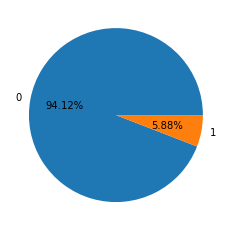

In [18]:
# Number of wall AU/NZ Plugs Queensland contains
wpg = q_df['Plugs_wall_AU/NZ'].value_counts()
plt.pie(wpg.values,labels=['0','1'],autopct="%.2f%%")
print(wpg)

### Total number of different plugs Queensland contains

In [19]:
total_wpg = q_df['Plugs_wall_AU/NZ'].sum()
print('Total number of Wall AU/NZ Plugs:', total_wpg)
total_chpg = q_df['Plugs_CHAdeMO'].sum()
print('Total number of CHAdeMO Plugs:', total_chpg)
total_ccssae = q_df['Plugs_CCS/SAE'].sum()
print('Total number of CCS/SAE Plugs:', total_ccssae)
total_tesla = q_df['Plugs_Tesla'].sum()
print('Total number of Tesla Plugs:', total_tesla)
total_j1772 = q_df['Plugs_J-1772'].sum()
print('Total number of J-1772 Plugs:', total_j1772)
total_type2 = q_df['Plugs_Type2'].sum()
print('Total number of Type-2 Plugs:', total_type2)


Total number of Wall AU/NZ Plugs: 1
Total number of CHAdeMO Plugs: 18
Total number of CCS/SAE Plugs: 18
Total number of Tesla Plugs: 1
Total number of J-1772 Plugs: 0
Total number of Type-2 Plugs: 30


In [20]:
total_qplugs = pd.DataFrame({'Plug Type':['Wall AU/NZ', 'CHAdeMO', 'CCS/SAE', 'Tesla', 'J-1772', 'Type2'],
                            'Total Plugs': [total_wpg, total_chpg, total_ccssae, total_tesla, total_j1772, total_type2]})
total_qplugs

,Plug Type,Total Plugs
0,Wall AU/NZ,1
1,CHAdeMO,18
2,CCS/SAE,18
3,Tesla,1
4,J-1772,0
5,Type2,30


Text(0.5, 1.0, 'Data Analysis of total number of plugs in Queensland')

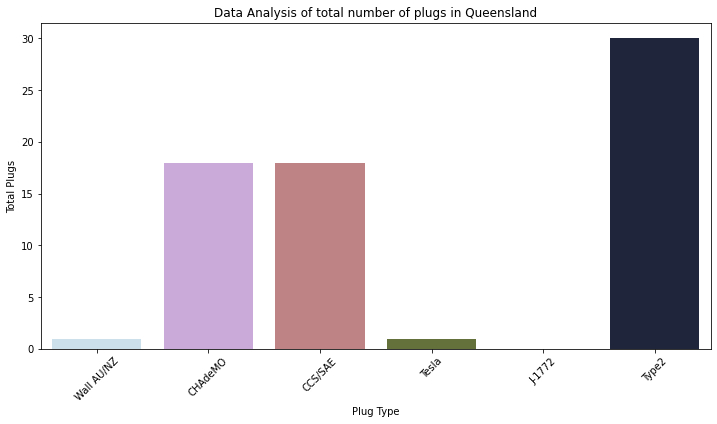

In [21]:
#Data Analysis of total number of plugs in Queensland
x = 'Wall AU/NZ','CHAdeMO','CCS/SAE','Tesla', 'J-1772', 'Type2'
y = 1, 18, 18, 1, 0, 30
qplugs_all = pd.DataFrame({'Plug Type':x, 'Total Plugs':y})
plt.figure(figsize=(12,6))
plt.xticks(rotation=45)
sns.barplot(x = 'Plug Type' ,y = 'Total Plugs' , data = qplugs_all ,
            palette = 'cubehelix_r' )
plt.title('Data Analysis of total number of plugs in Queensland')

In [22]:
# How many EV charging stations supports DC Charging in Queensland
total_dc = len(q_df[(q_df['KW_50']>0)])
print('Total number of EV Charging stations which supports DC Charging:', total_dc)

Total number of EV Charging stations which supports DC Charging: 17


In [23]:
# How many EV charging stations supports Basic or Destination AC charging in Queensland
total_ac = len(q_df[(q_df['KW_22']>0)])
print('Total number of EV Charging stations which supports Basic or Destination AC Charging:', total_ac)

Total number of EV Charging stations which supports Basic or Destination AC Charging: 17


**It shows that all the 17 stations supports both DC charging & AC charging.**

In [24]:
q_df.columns

Index(['Location Name', 'Latitude', 'Longitude', 'Address', 'Status',
       'Description', 'Nearest charging station', 'Plugs_wall_AU/NZ',
       'Plugs_CHAdeMO', 'Plugs_CCS/SAE', 'Plugs_Tesla', 'Plugs_J-1772',
       'Plugs_Type2', 'KW_50', 'KW_22', 'Location_category ', 'Car_parking',
       'Score', 'Contact_info', 'charging_stations', 'payment'],
      dtype='object')

In [25]:
from collections import Counter

c = Counter(q_df['Location_category '])
print(c)

Counter({'Public': 16, 'Commercial': 1})


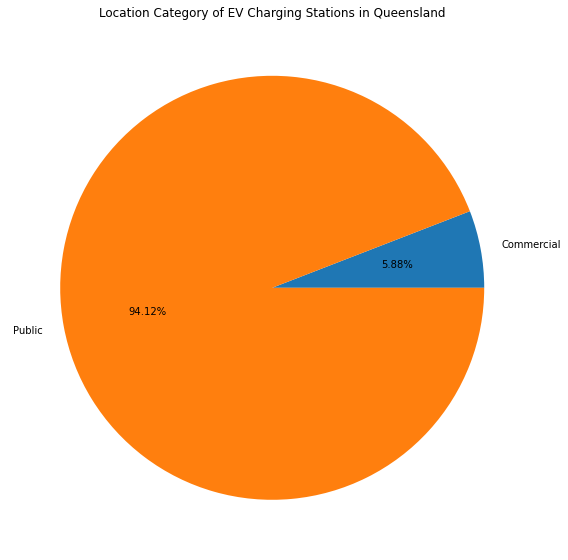

In [26]:
fig = plt.figure(figsize=(8,8))
plt.pie([float(c[v]) for v in c], labels=[str(k) for k in c], autopct="%.2f%%")
plt.title('Location Category of EV Charging Stations in Queensland') 
plt.tight_layout()

#### For the column Location_category, convert Public to 0, Commercial to 1 & Workplace to 2.


In [27]:
q_df['Location_category '] = q_df['Location_category '].apply(lambda x:0 if x=='Public' else 1 if x=='Commercial' else 2 )

In [28]:
q_df

,Location Name,Latitude,Longitude,Address,Status,Description,Nearest charging station,Plugs_wall_AU/NZ,Plugs_CHAdeMO,Plugs_CCS/SAE,...,Plugs_J-1772,Plugs_Type2,KW_50,KW_22,Location_category,Car_parking,Score,Contact_info,charging_stations,payment
Row_Indices,,,,,,,,,,,,,,,,,,,,,
0,Gatton,-27.551404,152.335073,"Building 8156, The University of Queensland, M...",Active,University of Queensland Gatton Veterinary Hos...,"Toowoomba: 55km West, \nBrisbane: 92km East",1,1,1,...,0,0,1,1,1,0,8.4,61-733652235,4,0.2
1,Cairns,-16.920457,145.778873,"1 Pier Point Rd, Cairns City QLD 4870, Australia",Active,Lagoon car park (between the Esplanade and Pie...,"The Pier Cairns: 0.1km, Pullman Reef Hotel Cas...",0,1,1,...,0,2,1,1,0,1,10.0,61-1300480903,3,0.3
2,Rockhampton,-23.382272,150.513462,"172-189 Alma St, Rockhampton City QLD 4700, Au...",Active,Alma St carpark of council building.,"Coffee House Apartment: 0.1km, Rockhampton Car...",0,1,1,...,0,2,1,1,0,0,10.0,NaN,3,0.2
3,Coolangatta,-28.164197,153.515274,"1 Eastern Ave, Bilinga 4225",Active,Gold Coast Airport. Carparks near northbound s...,"Rydges Gold Coast Airport: 0.4km, Southern Cro...",0,1,1,...,0,2,1,1,0,0,10.0,61-1300518038,3,0.3
4,Hamilton,-27.444492,153.083611,"North Shore Hamilton\n281 MacArthur Ave, Hamil...",Active,"Eat St carpark, near roundabout at end of Maca...","Eat St Northshore Car Park: 0.2km, Brisbane Ai...",0,2,2,...,0,2,1,1,0,0,10.0,61-1300480903,5,0.3
5,Maryborough,-25.539826,152.699153,"102 Lennox St, Maryborough 4650",Active,"Lennox St (near Alice St), perpendicular car p...","Square Shopping Centre Maryborough: 0km, Adela...",0,1,1,...,0,1,1,1,0,0,10.0,61-1300480903,3,0.2
6,Childers,-25.235607,152.278875,"1-3 Crescent St, Childers QLD 4660, Australia",Active,"Crescent St, new dedicated carpark created nea...",Lake Redbrook Retreat Queensland: 8.7km,0,1,1,...,0,1,1,1,0,0,10.0,61-1300480903,4,0.3
7,Marlborough,-22.827644,149.932780,"71209 Kunwarara Rd, Marlborough QLD 4705, Aust...",Active,"Puma service station, south of Marlborough","Rockhampton: 98km South, \nCarmila: 136km North",0,1,1,...,0,2,1,1,0,0,10.0,61-1300480903,3,0.2
8,Mackay,-21.139711,149.185238,"3 Gregory St, Mackay QLD 4740, Australia",Active,Council owned Carpark cnr Gregory and River Sts,"Riviera Mackay: 0.3km, Mackay Ocean Side Centr...",0,1,1,...,0,2,1,1,0,1,10.0,61-1300480903,3,0.2


In [29]:
# How many EV Charging stations have free or paid car parking in Queensland
qcar_df = len(q_df[(q_df.Car_parking == 0)])
print("Number of EV Charging stations having free car parking:", qcar_df)
qcar_df2 = len(q_df[(q_df.Car_parking == 1)])
print("Number of EV Charging stations having paid car parking:", qcar_df2)

Number of EV Charging stations having free car parking: 14
Number of EV Charging stations having paid car parking: 3


**It shows that 14 EV charging stations have free car parking while 3 are paid in Queensland**

In [30]:
# Number of stations based on Popularity Score
qscore_df = q_df[(q_df.Score > 7)]
print("Best number of Stations based on Popularity score in Queensland is:", len(qscore_df))

Best number of Stations based on Popularity score in Queensland is: 14


In [31]:
# Highest number of EV charging stations in a specific place in Queensland
qevcharge = q_df['charging_stations']
min_evcharge = qevcharge.min()
max_evcharge = qevcharge.max()
print('Maximum number of EV Charging stations at a specific place in Queensland:', max_evcharge)
print('Minimum number of EV Charging stations at a specific place in Queensland:', min_evcharge)

Maximum number of EV Charging stations at a specific place in Queensland: 5
Minimum number of EV Charging stations at a specific place in Queensland: 3


In [32]:
# Total number of charging stations including separate charging stations at a specific place
tqevcharge = q_df['charging_stations'].sum()
print('Total number of EV Charging stations including separate charging stations at a specific place in Queensland:', tqevcharge)

Total number of EV Charging stations including separate charging stations at a specific place in Queensland: 55


In [33]:
# Price of charging for EV users (in AUD/KWh)
qevprice = q_df['payment']
min_evprice = qevprice.min()
max_evprice = qevprice.max()
print('Maximum price of EV Charging for Users in Queensland:', max_evprice)
print('Minimum price of EV Charging for Users in Queensland:', min_evprice)

Maximum price of EV Charging for Users in Queensland: 0.3
Minimum price of EV Charging for Users in Queensland: 0.2


## EDA on Melbourne Dataset

In [34]:
# Queensland Data
m_df = newdf_au[17:].copy()

In [35]:
m_df

,Location Name,Latitude,Longitude,Address,Status,Description,Nearest charging station,Plugs_wall_AU/NZ,Plugs_CHAdeMO,Plugs_CCS/SAE,...,Plugs_J-1772,Plugs_Type2,KW_50,KW_22,Location_category,Car_parking,Score,Contact_info,charging_stations,payment
Row_Indices,,,,,,,,,,,,,,,,,,,,,
17,Yarraville,-37.818995,144.896498,"2/209 Hyde St, Yarraville VIC 3013",Active,In carpark of Unit 2/209. If cars parked call ...,"Lorbek Luxury Cars: 2.5km, Middy's Port Melbou...",0,0,0,...,0,0,0,1,Public,0,NaN,61-419944444,1,NaN
18,Kensington,-37.796875,144.926417,"72 Altona Street, Kensington VIC 3031",Active,BYO Type 2 Mennekes cable,"The Green Guys Group: 1.5km, District Dockland...",0,0,0,...,0,2,0,1,Public,0,NaN,NaN,2,0.3
19,Docklands,-37.812794,144.937390,"8-9 Star Circus, Docklands VIC 3008, Australia",Active,"Parking level 1 yellow, section D.",District Docklands Shopping - East Carpark: 0....,0,0,0,...,0,0,0,1,Commercial,0,8.0,NaN,1,0
20,Docklands,-37.812099,144.939245,"90 Waterfront Way, Docklands VIC 3008, Australia",Active,"East car park, level 1, south end. Park and ch...",District Docklands Shopping - West Carpark: 0....,0,0,0,...,0,0,0,1,Commercial,0,10.0,NaN,1,0
21,Carlton,-37.802161,144.967164,204-218 Lygon St Carlton Victoria 3053 Australia,Active,Station located on the right hand side as you ...,"Melbourne Museum: 0.6km, Melbourne Marriott: 0...",0,0,0,...,0,1,0,1,Commercial,1,8.2,NaN,1,p
22,Carlton,-37.803202,144.971757,"11 Nicholson St, Carlton VIC 3053, Australia",Active,Entry to the Melbourne Museum Cark Park is fro...,"Lygon Street Car Park: 0.6km, Melbourne Marrio...",0,0,0,...,2,0,0,1,Commercial,1,8.4,61-1300130152,2,p
23,Parliament PI,-37.811079,144.976439,"1 Parliament Square Off, Parliament Pl, Melbou...",Active,"Porsche Destination Chargers, 11kW. 2 stations...","Secure Parking (Southern Cross): 0.6km, Melbou...",0,0,0,...,0,2,0,1,Commercial,1,9.3,NaN,2,p
24,Pullman Melbourne,-37.815811,144.983239,"192 Wellington Parade, Melbourne VIC 3002",Active,"Dining, Restrooms, Valet Parking, WiFi, Park, ...","Park Hyatt Melbourne: 0.8km, Federation Squar...",0,0,0,...,0,0,0,1,Commercial,1,NaN,61-394192000,2,p
25,Port Melbourne,-37.829922,144.917110,"46 Cook St, Port Melbourne VIC 3207, Australia",Active,10A double power point next to rear access doo...,"Lorbek Luxury Cars: 0.3km, Middy's Port Melbou...",1,0,0,...,0,0,0,1,Public,0,NaN,NaN,1,p


### Total number of different plugs Melbourne contains

In [36]:
mtotal_wpg = m_df['Plugs_wall_AU/NZ'].sum()
print('Total number of Wall AU/NZ Plugs:', mtotal_wpg)
mtotal_chpg = m_df['Plugs_CHAdeMO'].sum()
print('Total number of CHAdeMO Plugs:', mtotal_chpg)
mtotal_ccssae = m_df['Plugs_CCS/SAE'].sum()
print('Total number of CCS/SAE Plugs:', mtotal_ccssae)
mtotal_tesla = m_df['Plugs_Tesla'].sum()
print('Total number of Tesla Plugs:', mtotal_tesla)
mtotal_j1772 = m_df['Plugs_J-1772'].sum()
print('Total number of J-1772 Plugs:', mtotal_j1772)
mtotal_type2 = m_df['Plugs_Type2'].sum()
print('Total number of Type-2 Plugs:', mtotal_type2)

Total number of Wall AU/NZ Plugs: 42
Total number of CHAdeMO Plugs: 1
Total number of CCS/SAE Plugs: 1
Total number of Tesla Plugs: 32
Total number of J-1772 Plugs: 8
Total number of Type-2 Plugs: 70


In [37]:
total_mplugs = pd.DataFrame({'Plug Type':['Wall AU/NZ', 'CHAdeMO', 'CCS/SAE', 'Tesla', 'J-1772', 'Type2'],
                            'Total Plugs': [mtotal_wpg, mtotal_chpg, mtotal_ccssae, mtotal_tesla, mtotal_j1772, mtotal_type2]})
total_mplugs

,Plug Type,Total Plugs
0,Wall AU/NZ,42
1,CHAdeMO,1
2,CCS/SAE,1
3,Tesla,32
4,J-1772,8
5,Type2,70


Text(0.5, 1.0, 'Data Analysis of total number of plugs in Melbourne')

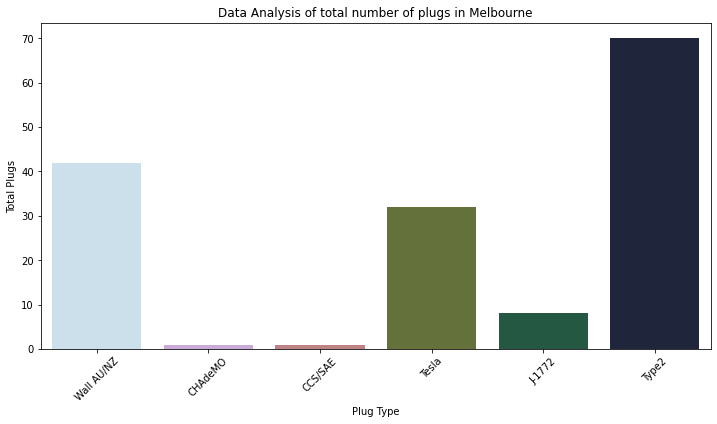

In [38]:
# Data Analysis of total number of plugs in Melbourne
x = 'Wall AU/NZ','CHAdeMO','CCS/SAE','Tesla', 'J-1772', 'Type2'
y = 42, 1, 1, 32, 8, 70
mplugs_all = pd.DataFrame({'Plug Type':x, 'Total Plugs':y})
plt.figure(figsize=(12,6))
plt.xticks(rotation=45)
sns.barplot(x = 'Plug Type' ,y = 'Total Plugs' , data = mplugs_all ,
            palette = 'cubehelix_r' )
plt.title('Data Analysis of total number of plugs in Melbourne')

In [39]:
# How many EV charging stations supports DC Charging in Melbourne
mtotal_dc = len(m_df[(m_df['KW_50']>0)])
print('Total number of EV Charging stations which supports DC Charging:', mtotal_dc)

Total number of EV Charging stations which supports DC Charging: 3


In [40]:
# How many EV charging stations supports Basic or Destination AC charging in Melbourne 
mtotal_ac = len(m_df[(m_df['KW_22']>0)])
print('Total number of EV Charging stations which supports Basic or Destination AC Charging:', mtotal_ac)

Total number of EV Charging stations which supports Basic or Destination AC Charging: 47


**It shows that overall 3 EV charging stations support DC Charging while 47 EV charging stations supports Basic or Destination AC Charging in Melbourne.**

In [41]:
m_df.columns

Index(['Location Name', 'Latitude', 'Longitude', 'Address', 'Status',
       'Description', 'Nearest charging station', 'Plugs_wall_AU/NZ',
       'Plugs_CHAdeMO', 'Plugs_CCS/SAE', 'Plugs_Tesla', 'Plugs_J-1772',
       'Plugs_Type2', 'KW_50', 'KW_22', 'Location_category ', 'Car_parking',
       'Score', 'Contact_info', 'charging_stations', 'payment'],
      dtype='object')

In [42]:
from collections import Counter

mc = Counter(m_df['Location_category '])
print(mc)

Counter({'Public': 35, 'Commercial': 13, 'Workplace': 2})


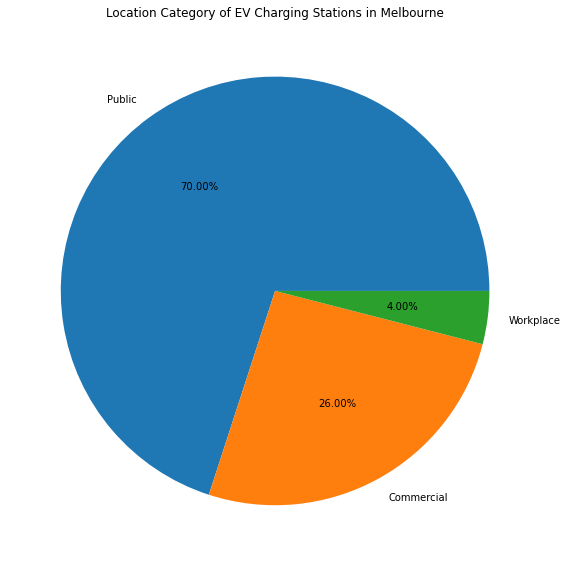

In [43]:
fig = plt.figure(figsize=(8,8))
plt.pie([float(mc[v]) for v in mc], labels=[str(k) for k in mc], autopct="%.2f%%")
plt.title('Location Category of EV Charging Stations in Melbourne') 
plt.tight_layout()

#### For the column Location_category, convert Public to 0, Commercial to 1 & Workplace to 2.


In [44]:
m_df['Location_category '] = m_df['Location_category '].apply(lambda x:0 if x=='Public' else 1 if x=='Commercial' else 2 )

In [45]:
m_df

,Location Name,Latitude,Longitude,Address,Status,Description,Nearest charging station,Plugs_wall_AU/NZ,Plugs_CHAdeMO,Plugs_CCS/SAE,...,Plugs_J-1772,Plugs_Type2,KW_50,KW_22,Location_category,Car_parking,Score,Contact_info,charging_stations,payment
Row_Indices,,,,,,,,,,,,,,,,,,,,,
17,Yarraville,-37.818995,144.896498,"2/209 Hyde St, Yarraville VIC 3013",Active,In carpark of Unit 2/209. If cars parked call ...,"Lorbek Luxury Cars: 2.5km, Middy's Port Melbou...",0,0,0,...,0,0,0,1,0,0,NaN,61-419944444,1,NaN
18,Kensington,-37.796875,144.926417,"72 Altona Street, Kensington VIC 3031",Active,BYO Type 2 Mennekes cable,"The Green Guys Group: 1.5km, District Dockland...",0,0,0,...,0,2,0,1,0,0,NaN,NaN,2,0.3
19,Docklands,-37.812794,144.937390,"8-9 Star Circus, Docklands VIC 3008, Australia",Active,"Parking level 1 yellow, section D.",District Docklands Shopping - East Carpark: 0....,0,0,0,...,0,0,0,1,1,0,8.0,NaN,1,0
20,Docklands,-37.812099,144.939245,"90 Waterfront Way, Docklands VIC 3008, Australia",Active,"East car park, level 1, south end. Park and ch...",District Docklands Shopping - West Carpark: 0....,0,0,0,...,0,0,0,1,1,0,10.0,NaN,1,0
21,Carlton,-37.802161,144.967164,204-218 Lygon St Carlton Victoria 3053 Australia,Active,Station located on the right hand side as you ...,"Melbourne Museum: 0.6km, Melbourne Marriott: 0...",0,0,0,...,0,1,0,1,1,1,8.2,NaN,1,p
22,Carlton,-37.803202,144.971757,"11 Nicholson St, Carlton VIC 3053, Australia",Active,Entry to the Melbourne Museum Cark Park is fro...,"Lygon Street Car Park: 0.6km, Melbourne Marrio...",0,0,0,...,2,0,0,1,1,1,8.4,61-1300130152,2,p
23,Parliament PI,-37.811079,144.976439,"1 Parliament Square Off, Parliament Pl, Melbou...",Active,"Porsche Destination Chargers, 11kW. 2 stations...","Secure Parking (Southern Cross): 0.6km, Melbou...",0,0,0,...,0,2,0,1,1,1,9.3,NaN,2,p
24,Pullman Melbourne,-37.815811,144.983239,"192 Wellington Parade, Melbourne VIC 3002",Active,"Dining, Restrooms, Valet Parking, WiFi, Park, ...","Park Hyatt Melbourne: 0.8km, Federation Squar...",0,0,0,...,0,0,0,1,1,1,NaN,61-394192000,2,p
25,Port Melbourne,-37.829922,144.917110,"46 Cook St, Port Melbourne VIC 3207, Australia",Active,10A double power point next to rear access doo...,"Lorbek Luxury Cars: 0.3km, Middy's Port Melbou...",1,0,0,...,0,0,0,1,0,0,NaN,NaN,1,p


In [46]:
# How many EV Charging stations have free or paid car parking in Melbourne
mcar_df = len(m_df[(m_df.Car_parking == 0)])
print("Number of EV Charging stations having free car parking:", mcar_df)
# How many EV Charging stations have free or paid car parking in Melbourne
mcar_df2 = len(m_df[(m_df.Car_parking == 1)])
print("Number of EV Charging stations having paid car parking:", mcar_df2)

Number of EV Charging stations having free car parking: 27
Number of EV Charging stations having paid car parking: 23


**There are 27 EV Charging stations which gives free parking while 23 EV Charging stations have paid parking in Melbourne** 

In [47]:
# Number of stations based on Popularity Score
mscore_df = m_df[(m_df.Score > 7)]
print("Best number of Stations based on Popularity score in Melbourne is:", len(mscore_df))

Best number of Stations based on Popularity score in Melbourne is: 21


In [48]:
# Highest number of EV charging stations in a specific place in Melbourne
mevcharge = m_df['charging_stations']
min_mevcharge = mevcharge.min()
max_mevcharge = mevcharge.max()
print('Maximum number of EV Charging stations at a specific place in Melbourne:', max_mevcharge)
print('Minimum number of EV Charging stations at a specific place in Melbourne:', min_mevcharge)

Maximum number of EV Charging stations at a specific place in Melbourne: 21
Minimum number of EV Charging stations at a specific place in Melbourne: 1


In [49]:
# Total number of charging stations including separate charging stations at a specific place
tmevcharge = m_df['charging_stations'].sum()
print('Total number of EV Charging stations including separate charging stations at a specific place in Melbourne:', tmevcharge)

Total number of EV Charging stations including separate charging stations at a specific place in Melbourne: 154


In [50]:
# Price of charging for EV users (in AUD/KWh)
mpay = m_df[(m_df.payment == '0') & (m_df.payment != None)]
print("Total Number of stations who provide free charging in Melbourne:" , len(mpay))

Total Number of stations who provide free charging in Melbourne: 11


In [51]:
# Price of charging for EV users (in AUD/KWh)
mevprice = m_df[(m_df.payment > '0') & (m_df.payment != None)]

In [52]:
mevprice = mevprice[(mevprice.payment != 'p')]

In [53]:
min_mevprice = mevprice['payment'].min()
max_mevprice = mevprice['payment'].max()
print('Maximum price of EV Charging for Users in Melbourne:', max_mevprice)
print('Minimum price of EV Charging for Users in Melbourne:', min_mevprice)

Maximum price of EV Charging for Users in Melbourne: 0.4
Minimum price of EV Charging for Users in Melbourne: 0.2
